In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


In [3]:
 url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
 df = pd.read_excel(url)
 df = df.sample(frac=1).reset_index(drop = True)

In [4]:
stats = df.describe()

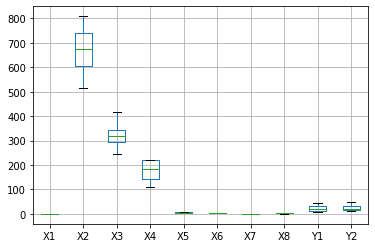

In [5]:
df.boxplot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.value_counts()

X1    X2     X3     X4      X5   X6  X7    X8  Y1     Y2   
0.98  514.5  294.0  110.25  7.0  5   0.40  5   32.73  34.01    1
                                           4   32.74  33.88    1
0.71  710.5  269.5  220.50  3.5  2   0.10  5   10.78  14.18    1
                                           4   10.66  13.67    1
                                           3   10.77  14.14    1
                                                              ..
0.79  637.0  343.0  147.00  7.0  5   0.40  3   42.08  38.23    1
                                           2   41.92  48.03    1
                                           1   41.67  46.94    1
                                     0.25  5   38.65  43.73    1
0.62  808.5  367.5  220.50  3.5  2   0.00  0   8.60   12.07    1
Length: 768, dtype: int64

In [8]:
df.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

In [9]:
df.shape

(768, 10)

In [18]:
train_df, test_df = train_test_split(df,test_size = .2)

In [20]:
train_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.765244,670.757329,317.861564,176.447883,5.261401,3.521173,0.239088,2.815961,22.438072,24.676287
std,0.105419,87.809781,43.445260,45.048328,1.751390,1.124562,0.134728,1.562302,10.141582,9.551232
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.940000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,3.000000,0.100000,1.000000,13.000000,15.640000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,18.950000,22.390000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,32.082500,33.362500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,47.590000


In [21]:
train_y = train_df['Y1'], train_df['Y2']

In [22]:
train_df.pop('Y1')
train_df.pop('Y2')

431    37.73
15     33.34
444    33.31
103    15.64
344    14.67
       ...  
470    15.41
333    29.56
63     33.23
602    19.18
582    14.45
Name: Y2, Length: 614, dtype: float64

In [23]:
train_stats = train_df.describe().transpose()

In [24]:
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.765244,0.105419,0.62,0.69,0.76,0.86,0.98
X2,614.0,670.757329,87.809781,514.50,588.00,661.50,735.00,808.50
X3,614.0,317.861564,43.445260,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.447883,45.048328,110.25,147.00,147.00,220.50,220.50
X5,614.0,5.261401,1.751390,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.521173,1.124562,2.00,3.00,4.00,5.00,5.00
X7,614.0,0.239088,0.134728,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.815961,1.562302,0.00,1.00,3.00,4.00,5.00


In [25]:
train_df_normed = (train_df - train_stats['mean']) / train_stats['std']

In [27]:
test_Y = test_df['Y1'], test_df['Y2']

In [ ]:
test_df.pop('Y1')
test_df.pop('Y2')

In [29]:
test_df_normed = (test_df - train_stats['mean']) / train_stats['std']

In [ ]:
test_df_normed

In [123]:
input = Input(shape=(train_df.shape[1]))
x = Dense(32, activation = 'relu')(input)
out1 = Dense(1, activation = 'relu', name = 'y1_out')(x)
out2 = Dense(64, activation='relu')(x)
out2 = Dense(1,activation = 'relu', name = 'y2_out')(out2)

model = Model(inputs = input, outputs = [out1, out2])

In [124]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 32)           288         input_5[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           2112        dense_10[0][0]                   
__________________________________________________________________________________________________
y1_out (Dense)                  (None, 1)            33          dense_10[0][0]                   
____________________________________________________________________________________________

In [139]:
model.compile(tf.keras.optimizers.SGD(learning_rate=.001),
              loss = {'y1_out' : 'mse', 'y2_out' : 'mse'},
              metrics = {'y1_out': tf.keras.metrics.RootMeanSquaredError(), 'y2_out' : tf.keras.metrics.RootMeanSquaredError()}
              )

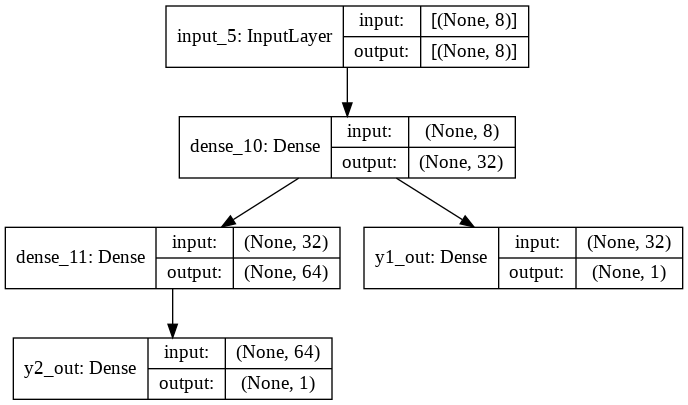

In [140]:
plot_model(model, show_shapes=True)

In [141]:
history = model.fit(x = train_df_normed, y = train_y, epochs=2000,verbose = 1, validation_data=(test_df_normed, test_Y))

Epoch 1/2000
20/20 [==============================] - 1s 18ms/step - loss: 1161.0946 - y1_out_loss: 547.9511 - y2_out_loss: 613.1435 - y1_out_root_mean_squared_error: 23.3920 - y2_out_root_mean_squared_error: 24.7248 - val_loss: 335.2277 - val_y1_out_loss: 250.7603 - val_y2_out_loss: 84.4675 - val_y1_out_root_mean_squared_error: 15.8354 - val_y2_out_root_mean_squared_error: 9.1906
Epoch 2/2000
20/20 [==============================] - 0s 4ms/step - loss: 266.7604 - y1_out_loss: 200.0884 - y2_out_loss: 66.6719 - y1_out_root_mean_squared_error: 14.0131 - y2_out_root_mean_squared_error: 8.1167 - val_loss: 110.1432 - val_y1_out_loss: 68.4734 - val_y2_out_loss: 41.6698 - val_y1_out_root_mean_squared_error: 8.2749 - val_y2_out_root_mean_squared_error: 6.4552
Epoch 3/2000
20/20 [==============================] - 0s 4ms/step - loss: 79.1239 - y1_out_loss: 48.7813 - y2_out_loss: 30.3425 - y1_out_root_mean_squared_error: 6.9805 - y2_out_root_mean_squared_error: 5.5045 - val_loss: 68.2872 - val_y1

In [143]:
y_pred = model.predict(test_df_normed)

In [144]:
def scatterPlot(y_pred, y_true,title):
  plt.figure(figsize = (8,8))
  plt.scatter(y_true,y_pred)
  plt.title(title)
  plt.axis('equal')
  plt.axis('square')
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100,100],[-100,100])
  plt.show()

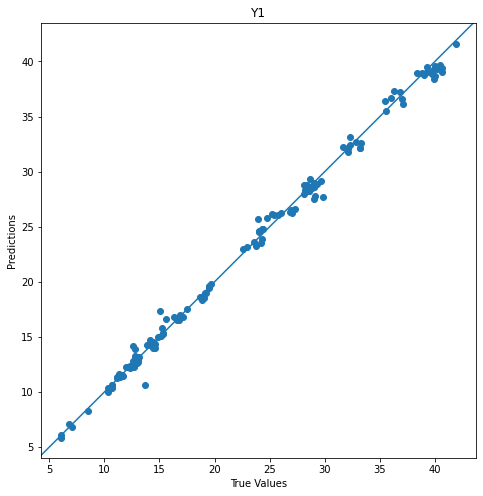

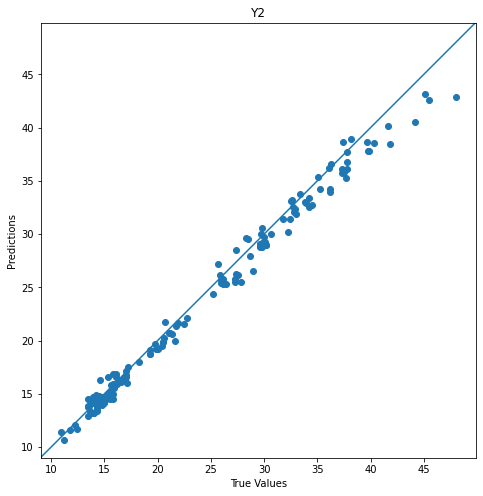

In [145]:
scatterPlot(y_pred[0], test_Y[0], "Y1")
scatterPlot(y_pred[1], test_Y[1], "Y2")

In [ ]:
history.history

In [147]:
def plot_metric(metric,figsize = (8,8), y_lim = 5):
  plt.figure(figsize=figsize)
  plt.ylim(0,y_lim)
  plt.title(metric)
  plt.plot(history.history[metric],color = 'blue',label = metric)
  plt.plot(history.history['val_' + metric],color = 'green', label = 'val_' + metric)
  plt.legend()
  plt.show()

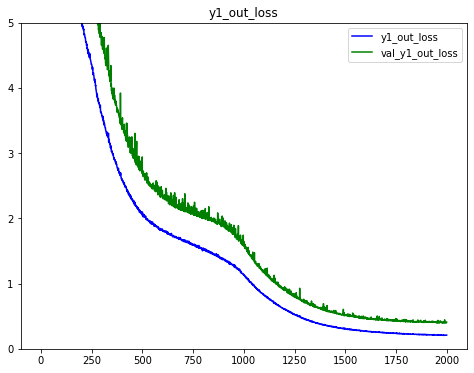

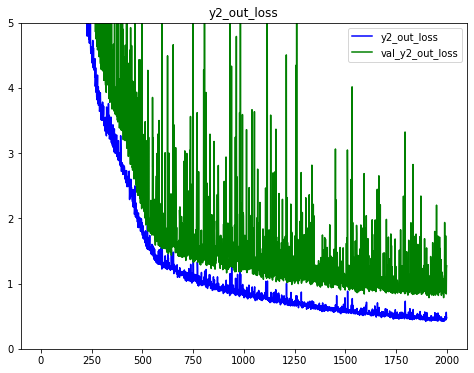

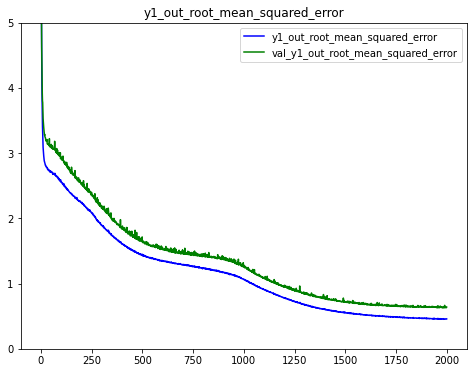

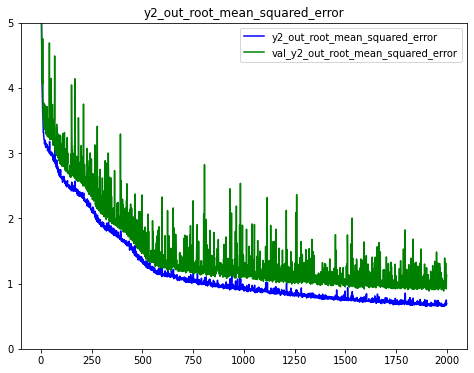

In [149]:
# plot_metric('loss',(8,6),y_lim = 8)
plot_metric('y1_out_loss',(8,6),y_lim = 5)
plot_metric('y2_out_loss',(8,6),y_lim = 5)
plot_metric('y1_out_root_mean_squared_error',(8,6),y_lim = 5)
plot_metric('y2_out_root_mean_squared_error',(8,6),y_lim = 5)